# WeatherPy
----

### Observations

- It does become hotter as it gets closer to the Equator.
    - A possible reason that it could be slightly hotter at around 20 degrees latitude in the northern Hemisphere is because of the Earth's 23.5 degree tilt.
    - Also, the southern hemisphere doesn't have as many data points beacuse there is much more land mass in the northern hemisphere, and therefore more cities.  We could generate coordinates using our methods, but they would land in the ocean much more often if the latitude is in the southern hemisphere.

- It appears to get more humid the further away from the equator a city is.

- It seems that more extreme wind speeds occur further away from the Equator.

- Cloudiness does not seem to be affected by distance from the Equator

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
import gmaps

# Import API key
from api_keys import api_key
from api_keys import gkey

#Access maps with gkey
gmaps.configure(api_key=gkey)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"

city_sets = []
weather_list = []

for x in range(1,15):
    city_set = random.sample(cities, 50)
    city_sets.append(city_set)

print("Beginning Data Retrieval")
print("------------------------")    

weather_list = []
    
for city in cities:
        if len(weather_list) == 1000:
            print("End of Data Retrieval")
            break
        try:
            print(f"Processing Record {cities.index(city) + 1} | {city}")

            city_url = url + "appid=" + api_key + "&q=" + city
            response = requests.get(city_url)
            city_weather = response.json()    

            weather_list.append({
                "City": city_weather['name'],
                "Country": city_weather['sys']['country'],
                "Temperature": (city_weather['main']['temp'] - 273.15),
                "Humidity": city_weather['main']['humidity'],
                "Cloudiness": city_weather['clouds']['all'],
                "Max Temp": (city_weather['main']['temp_max'] - 273.15),
                "Wind Speed": city_weather['wind']['speed'],
                "Latitude": city_weather['coord']['lat'],
                "Longitude": city_weather['coord']['lon'],
                "Date": time.ctime(city_weather['dt'])
            })
        except KeyError:
            print("City not found.  Skipping...")

Beginning Data Retrieval
------------------------
Processing Record 1 | nikolskoye
Processing Record 2 | sabang
Processing Record 3 | ozgon
City not found.  Skipping...
Processing Record 4 | saint-philippe
Processing Record 5 | jamestown
Processing Record 6 | taolanaro
City not found.  Skipping...
Processing Record 7 | busselton
Processing Record 8 | tuatapere
Processing Record 9 | anahuac
Processing Record 10 | juneau
Processing Record 11 | punta arenas
Processing Record 12 | kysyl-syr
Processing Record 13 | bluff
Processing Record 14 | nuuk
Processing Record 15 | vestmanna
Processing Record 16 | shingu
Processing Record 17 | patrocinio
Processing Record 18 | huilong
Processing Record 19 | carnarvon
Processing Record 20 | rawannawi
City not found.  Skipping...
Processing Record 21 | avarua
Processing Record 22 | butaritari
Processing Record 23 | yellowknife
Processing Record 24 | mount gambier
Processing Record 25 | wahpeton
Processing Record 26 | yirol
City not found.  Skipping...
Pr

Processing Record 228 | tumannyy
City not found.  Skipping...
Processing Record 229 | tilichiki
Processing Record 230 | kruisfontein
Processing Record 231 | umm durman
City not found.  Skipping...
Processing Record 232 | geraldton
Processing Record 233 | lorengau
Processing Record 234 | guerrero negro
Processing Record 235 | presidencia roque saenz pena
Processing Record 236 | taltal
Processing Record 237 | cockburn town
Processing Record 238 | asau
City not found.  Skipping...
Processing Record 239 | tigil
Processing Record 240 | vallenar
Processing Record 241 | lubumbashi
Processing Record 242 | los llanos de aridane
Processing Record 243 | westport
Processing Record 244 | kodiak
Processing Record 245 | zolotinka
City not found.  Skipping...
Processing Record 246 | hansi
Processing Record 247 | linxia
Processing Record 248 | grand-santi
Processing Record 249 | santa fe
Processing Record 250 | lumphat
Processing Record 251 | souillac
Processing Record 252 | mahanoro
Processing Record 

Processing Record 448 | asfi
City not found.  Skipping...
Processing Record 449 | kutum
Processing Record 450 | roma
Processing Record 451 | fevralsk
City not found.  Skipping...
Processing Record 452 | krasnovishersk
Processing Record 453 | tocopilla
Processing Record 454 | swift current
Processing Record 455 | andevoranto
City not found.  Skipping...
Processing Record 456 | may pen
Processing Record 457 | cururupu
Processing Record 458 | oktyabrskiy
Processing Record 459 | gurupi
Processing Record 460 | jamtara
Processing Record 461 | aripuana
Processing Record 462 | sao joao do piaui
Processing Record 463 | pacific grove
Processing Record 464 | san anselmo
Processing Record 465 | akdepe
Processing Record 466 | kadykchan
City not found.  Skipping...
Processing Record 467 | monrovia
Processing Record 468 | cayenne
Processing Record 469 | mareeba
Processing Record 470 | aklavik
Processing Record 471 | miri
Processing Record 472 | klaksvik
Processing Record 473 | salekhard
Processing Re

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = pd.DataFrame(weather_list)
weather_df['Temperature (F)'] = (weather_df['Temperature'] * (9/5)) + 32
weather_df['Max Temp (F)'] = (weather_df['Max Temp'] * (9/5)) + 32
weather_df.to_csv('City Weather.csv')

weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Temperature,Wind Speed,Temperature (F),Max Temp (F)
0,Nikolskoye,75,RU,Thu Aug 15 10:00:27 2019,88,59.70,30.79,19.440,17.210,5.00,62.9780,66.9920
1,Sabang,100,PH,Thu Aug 15 10:00:27 2019,81,13.80,121.11,27.220,27.220,0.89,80.9960,80.9960
2,Saint-Philippe,1,CA,Thu Aug 15 10:00:28 2019,53,45.36,-73.48,22.220,20.610,2.18,69.0980,71.9960
3,Jamestown,50,AU,Thu Aug 15 09:59:41 2019,23,-33.21,138.60,13.256,13.256,5.10,55.8608,55.8608
4,Busselton,64,AU,Thu Aug 15 10:00:28 2019,69,-33.64,115.35,11.110,10.250,8.47,50.4500,51.9980


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

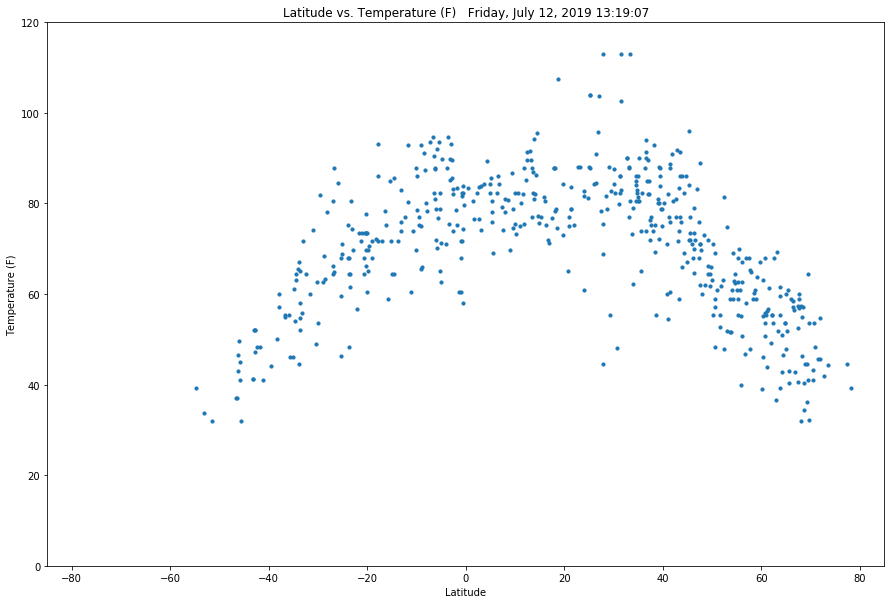

In [5]:
weather_df.plot(kind='scatter', x='Latitude', y='Max Temp (F)', figsize=(15,10), s=10)
plt.xlim(-85, 85)
plt.ylim(0, 120)
plt.title('Latitude vs. Temperature (F)   Friday, July 12, 2019 13:19:07')
plt.ylabel('Temperature (F)')
plt.savefig('Output_Files/Latitude_vs_Temperature.png')

#### Latitude vs. Humidity Plot

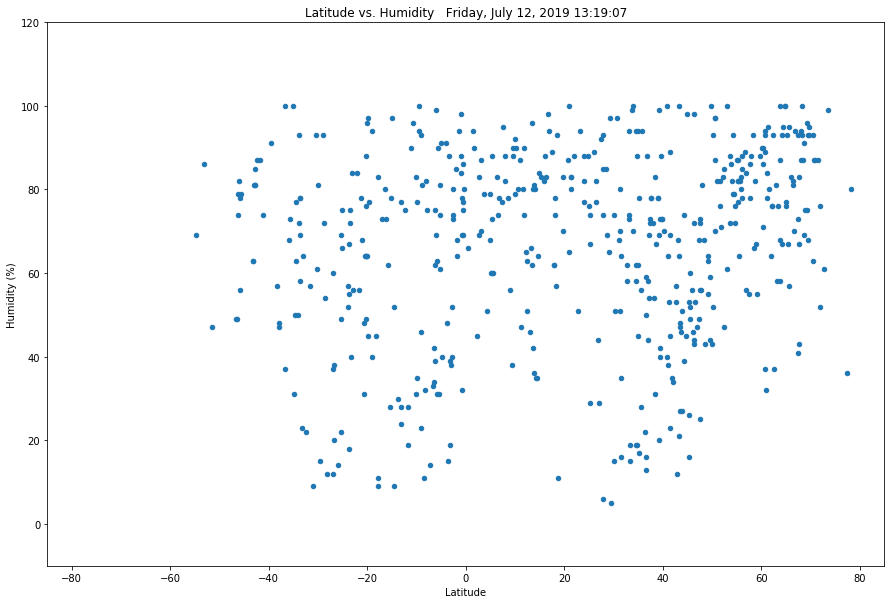

In [6]:
weather_df.plot(kind='scatter', x='Latitude', y='Humidity', figsize=(15,10))
plt.xlim(-85, 85)
plt.ylim(-10, 120)
plt.title('Latitude vs. Humidity   Friday, July 12, 2019 13:19:07')
plt.ylabel('Humidity (%)')
plt.savefig('Output_Files/Latitude_vs_Humidity.png')

#### Latitude vs. Cloudiness Plot

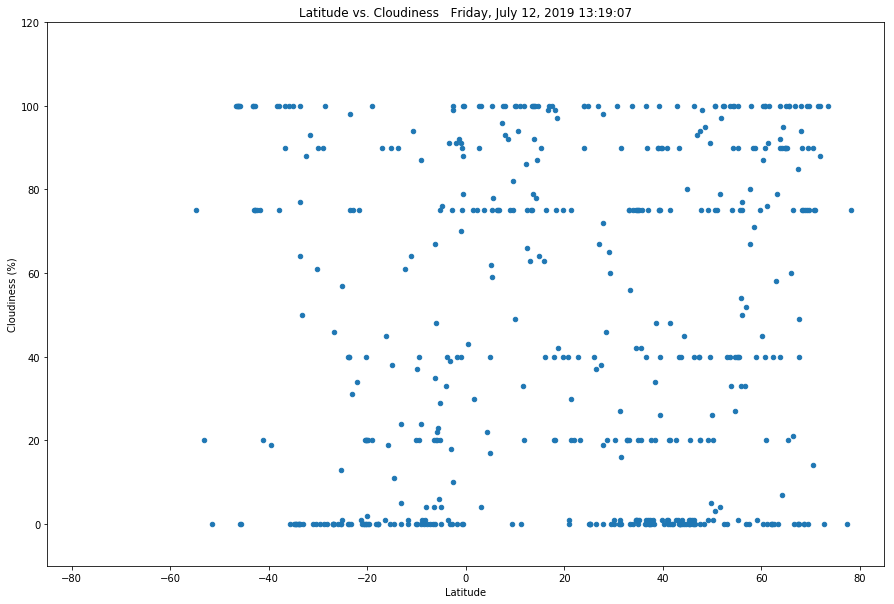

In [7]:
weather_df.plot(kind='scatter', x='Latitude', y='Cloudiness', figsize=(15,10))
plt.xlim(-85, 85)
plt.ylim(-10, 120)
plt.ylabel('Cloudiness (%)')
plt.title('Latitude vs. Cloudiness   Friday, July 12, 2019 13:19:07')
plt.savefig('Output_Files/Latitude_vs_Cloudiness.png')

#### Latitude vs. Wind Speed Plot

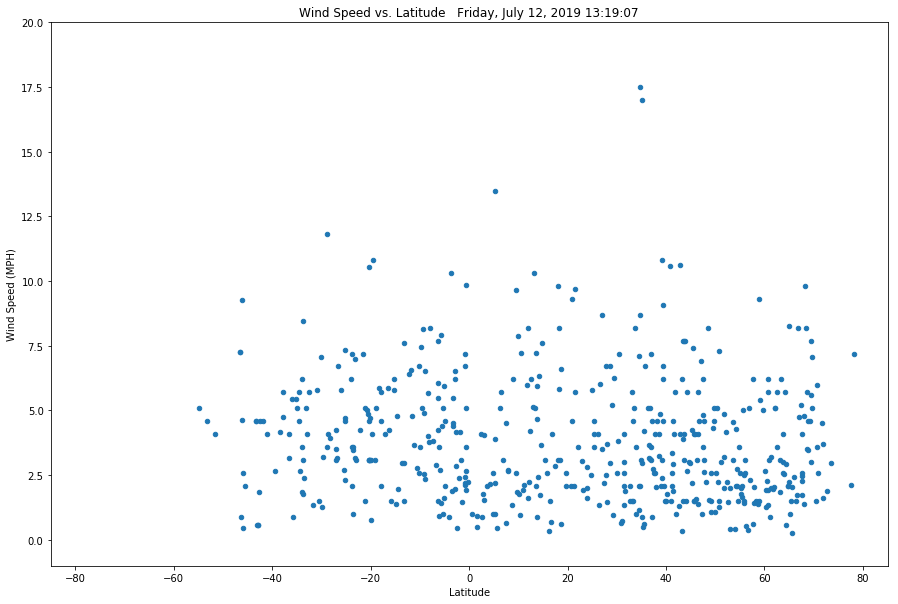

In [8]:
weather_df.plot(kind='scatter', x='Latitude', y='Wind Speed', figsize=(15,10))
plt.xlim(-85, 85)
plt.ylim(-1, 20)
plt.title('Wind Speed vs. Latitude   Friday, July 12, 2019 13:19:07')
plt.ylabel('Wind Speed (MPH)')
plt.savefig('Output_Files/Latitude_vs_Wind_Speed.png')

In [10]:
weather_df.to_html('Weather Analysis.html')